In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# PubChem AID 891

## Assay info

The P450 gene superfamily is involved in the metabolism and clearance of xenobiotics. This assay used human CYP2D6 to measure the demethylation of ethylene glycol ester of luciferin 6' methyl ether (Luciferin-ME EGE; luciferin detection buffer) to luciferin. The luciferin is then measured by luminescence after the addition of a luciferase detection reagent. Luciferin-ME EGE concentration in the assay was equal to its Km for CYP2D6. Inhibitors and some substrates limit the production of luciferin, and decrease measured luminescence.




In [3]:
df = pd.read_csv("PubChem_AID_891/AID_891_datatable_all.csv")

In [4]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Phenotype',
 'Potency',
 'Efficacy',
 'Analysis Comment',
 'Curve_Description',
 'Fit_LogAC50',
 'Fit_HillSlope',
 'Fit_R2',
 'Fit_InfiniteActivity',
 'Fit_ZeroActivity',
 'Fit_CurveClass',
 'Excluded_Points',
 'Max_Response',
 'Activity at 0.0007000000 uM',
 'Activity at 0.00160 uM',
 'Activity at 0.00370 uM',
 'Activity at 0.00820 uM',
 'Activity at 0.018 uM',
 'Activity at 0.041 uM',
 'Activity at 0.092 uM',
 'Activity at 0.205 uM',
 'Activity at 0.457 uM',
 'Activity at 1.022 uM',
 'Activity at 2.286 uM',
 'Activity at 5.112 uM',
 'Activity at 11.43 uM',
 'Activity at 25.56 uM',
 'Activity at 57.14 uM',
 'Compound QC']

In [5]:
# first 4 rows are metadata 
df[0:5]

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                     RESULT_TYPE          NaN          NaN   
1                    RESULT_DESCR          NaN          NaN   
2                     RESULT_UNIT          NaN          NaN   
3  RESULT_IS_ACTIVE_CONCENTRATION          NaN          NaN   
4       RESULT_ATTR_CONC_MICROMOL          NaN          NaN   

  PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0                           NaN                      NaN   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                           NaN                      NaN   
4                           NaN                      NaN   

   PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  PUBCHEM_ASSAYDATA_COMMENT  \
0                     NaN                   NaN                        NaN   
1                     NaN                   NaN                        NaN   
2                     NaN                   NaN                        NaN   
3                     NaN                   NaN                        NaN   
4                     NaN                   NaN                        NaN   

                                           Phenotype  \
0                                             STRING   
1  Indicates type of activity observed: inhibitor...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                             Potency  ...  \
0                                              FLOAT  ...   
1  Concentration at which compound exhibits half-...  ...   
2                                         MICROMOLAR  ...   
3                                               TRUE  ...   
4                                                NaN  ...   

                 Activity at 0.092 uM                Activity at 0.205 uM  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                              0.0915                              0.2045   

                 Activity at 0.457 uM                Activity at 1.022 uM  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                              0.4572                              1.0224   

                 Activity at 2.286 uM                Activity at 5.112 uM  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                               2.286                              5.1115   

                 Activity at 11.43 uM                Activity at 25.56 uM  \
0                               FLOAT                               FLOAT   
1  % Activity at given concentration.  % Activity at given concentration.   
2                             PERCENT                             PERCENT   
3                                 NaN                                 NaN   
4                             11.4293                             25.5558   

                 Activity at 57.14 uM  \
0                               FLOAT   
1  % Activity at given concentration.   
2                             PERCENT   
3                                 NaN   
4                             57.1429   

   

In [6]:
    df = df.drop(labels=list(range(0, 5)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head(10)

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                  1   11113142.0    6604612.0   
1                  2   11113177.0    6604463.0   
2                  3   11112554.0     441975.0   
3                  4   11114294.0    6604953.0   
4                  5   11113683.0    6604753.0   
5                  6   11113494.0    4687238.0   
6                  7   11112640.0    6604355.0   
7                  8   11113842.0     154412.0   
8                  9   26752587.0   10541888.0   
9                 10   11113175.0    6604355.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0  CC[C@@H]1CN2CC[C@@H]1C[C@H]2[C@H](C3=C4C=C(C=C...                   Active   
1  CN1C[C@@H](C[C@@]2([C@@H]1CC3=CN(C4=CC=CC2=C34...                   Active   
2  C[C@H]1[C@H]2CN3CCC4=C([C@@H]3C[C@@H]2C(=CO1)C...                   Active   
3  CC(C)C1=NC(=C(C=C1)C(=O)C2=CC=CS2)SCCCCCCCCNC....                   Active   
4  CC[C@@H](C(=O)OC1C[C@H]2CC[C@@H](C1)N2C)OC3=CC...                   Active   
5            C1CC2(CCN(CC2)CC3=CC=CC=C3)C4=CC=CC=C41                   Active   
6  CN1C[C@@H](C[C@@H]2[C@@H]1CC3=CN(C4=CC=CC2=C34...                   Active   
7          CN1CCN2[C@@H](C1)C3=CC=CC=C3CC4=CC=CC=C42                   Active   
8            COC(=O)C(C(C1=CC=CC=C1)NC(=O)OC)C(=O)OC                   Active   
9  CN1C[C@@H](C[C@@H]2[C@@H]1CC3=CN(C4=CC=CC2=C34...                   Active   

   PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  PUBCHEM_ASSAYDATA_COMMENT  \
0                    99.0                   NaN                        NaN   
1                    99.0                   NaN                        NaN   
2                    99.0                   NaN                        NaN   
3                    98.0                   NaN                        NaN   
4                    98.0                   NaN                        NaN   
5                    98.0                   NaN                        NaN   
6                    97.0                   NaN                        NaN   
7                    97.0                   NaN                        NaN   
8                    97.0                   NaN                        NaN   
9                    97.0                   NaN                        NaN   

   Phenotype Potency  ... Activity at 0.092 uM Activity at 0.205 uM  \
0  Inhibitor  0.0016  ...               -85.03               -86.36   
1  Inhibitor  0.0025  ...               -83.39               -86.43   
2  Inhibitor   0.002  ...                  NaN               -87.82   
3  Inhibitor  0.0063  ...               -82.52               -87.46   
4  Inhibitor  0.0063  ...               -89.02               -92.45   
5  Inhibitor  0.0063  ...               -76.88               -81.69   
6  Inhibitor  0.0063  ...                  NaN                -84.2   
7  Inhibitor    0.01  ...               -81.08               -87.15   
8  Inhibitor  0.0079  ...                  -85                  NaN   
9  Inhibitor    0.01  ...               -78.12               -79.42   

  Activity at 0.457 uM Activity at 1.022 uM Activity at 2.286 uM  \
0               -95.24               -90.27               -88.79   
1               -96.46               -87.64               -88.42   
2               -87.65               -88.19               -86.17   
3               -100.9                -92.5               -90.42   
4               -93.32               -94.58               -94.36   
5               -91.97                -86.8               -85.26   
6               -85.42               -86.86               -86.61   
7               -95.89                -92.8               -93.65   
8               -90.39                  NaN               -92.17   
9               -89.84               -89.06               -90.11   

  Activity at 5.112 uM Activity at 11.43 uM Activity at 25.56 uM  \
0               -89.92                  NaN               -100.4   
1               -91.54           

In [8]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype', 'Potency', 'Efficacy',
       'Analysis Comment', 'Curve_Description', 'Fit_LogAC50', 'Fit_HillSlope',
       'Fit_R2', 'Fit_InfiniteActivity', 'Fit_ZeroActivity', 'Fit_CurveClass',
       'Excluded_Points', 'Max_Response', 'Activity at 0.0007000000 uM',
       'Activity at 0.00160 uM', 'Activity at 0.00370 uM',
       'Activity at 0.00820 uM', 'Activity at 0.018 uM',
       'Activity at 0.041 uM', 'Activity at 0.092 uM', 'Activity at 0.205 uM',
       'Activity at 0.457 uM', 'Activity at 1.022 uM', 'Activity at 2.286 uM',
       'Activity at 5.112 uM', 'Activity at 11.43 uM', 'Activity at 25.56 uM',
       'Activity at 57.14 uM', 'Compound QC'],
      dtype='object')

In [9]:
# lets look at activity

In [10]:
df["Phenotype"].value_counts()

Phenotype
Inactive     6647
Inhibitor    3498
Activator     175
Name: count, dtype: int64

In [11]:
df = df.query("Phenotype == 'Inhibitor'")

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

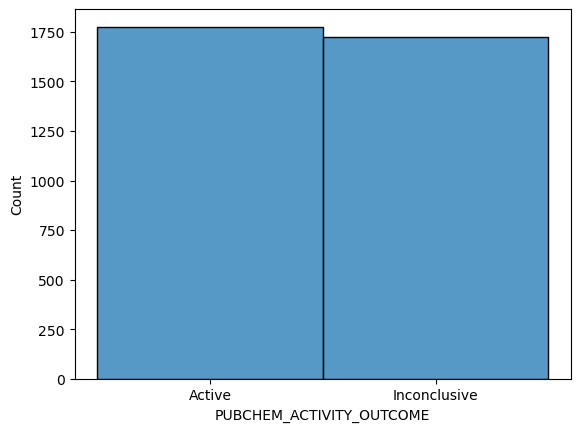

In [12]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

In [13]:
import matplotlib.pyplot as plt

In [14]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [15]:
len(df)

3498

In [16]:
df["PUBCHEM_SID"] = df["PUBCHEM_SID"].astype(int)
# df["PUBCHEM_CID"] = df["PUBCHEM_CID"].astype(int)

In [17]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [18]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [19]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df[mol_col].progress_apply(lambda x: standardize_smiles(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3498/3498 [00:23<00:00, 150.65it/s]


In [20]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [21]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3498/3498 [00:00<00:00, 3781.46it/s]


In [22]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

np.int64(12)

In [23]:
df.dropna(subset="INCHIKEY")

PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                     1     11113142    6604612.0   
1                     2     11113177    6604463.0   
2                     3     11112554     441975.0   
3                     4     11114294    6604953.0   
4                     5     11113683    6604753.0   
...                 ...          ...          ...   
3493               3494      4237475    3232588.0   
3494               3495      4239696    3234803.0   
3495               3496      4238453    3233563.0   
3496               3497     11111948    6604038.0   
3497               3498      4238452    3233562.0   

                          PUBCHEM_EXT_DATASOURCE_SMILES  \
0     CC[C@@H]1CN2CC[C@@H]1C[C@H]2[C@H](C3=C4C=C(C=C...   
1     CN1C[C@@H](C[C@@]2([C@@H]1CC3=CN(C4=CC=CC2=C34...   
2     C[C@H]1[C@H]2CN3CCC4=C([C@@H]3C[C@@H]2C(=CO1)C...   
3     CC(C)C1=NC(=C(C=C1)C(=O)C2=CC=CS2)SCCCCCCCCNC....   
4     CC[C@@H](C(=O)OC1C[C@H]2CC[C@@H](C1)N2C)OC3=CC...   
...                                                 ...   
3493     C1=CC=C2C(=C1)C(=NC(=N2)C3=COC=C3)NC4=CC=NC=C4   
3494       CN(CC1=CC=CO1)C2=NC=NC=C2C3=CC=CC=C3C(F)(F)F   
3495     CS(=O)(=O)N1CCC2(CCCN(C2)CC3=CC=C(C=C3)C#N)CC1   
3496  C[C@@]12CC=C3[C@H]([C@H]1CC[C@H]2C(=O)CN4CCN(C...   
3497        CN(C)C(=O)C1=CC=C(C=C1)C2=CN=CN=C2N3C=CN=C3   

     PUBCHEM_ACTIVITY_OUTCOME  PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  \
0                      Active                    99.0                   NaN   
1                      Active                    99.0                   NaN   
2                      Active                    99.0                   NaN   
3                      Active                    98.0                   NaN   
4                      Active                    98.0                   NaN   
...                       ...                     ...                   ...   
3493             Inconclusive                    20.0                   NaN   
3494             Inconclusive                    20.0                   NaN   
3495             Inconclusive                    20.0                   NaN   
3496             Inconclusive                    20.0                   NaN   
3497             Inconclusive                    20.0                   NaN   

      PUBCHEM_ASSAYDATA_COMMENT  Phenotype  Potency  ... Activity at 0.457 uM  \
0                           NaN  Inhibitor   0.0016  ...               -95.24   
1                           NaN  Inhibitor   0.0025  ...               -96.46   
2                           NaN  Inhibitor    0.002  ...               -87.65   
3                           NaN  Inhibitor   0.0063  ...               -100.9   
4                           NaN  Inhibitor   0.0063  ...               -93.32   
...                         ...        ...      ...  ...                  ...   
3493                        NaN  Inhibitor  15.8489  ...                10.78   
3494                        NaN  Inhibitor  19.9526  ...                2.738   
3495                        NaN  Inhibitor  19.9526  ...                16.94   
3496                        NaN  Inhibitor  25.1189  ...               0.6449   
3497                        NaN  Inhibitor  25.1189  ...               0.4102   

     Activity at 1.022 uM Activity at 2.286 uM Activity at 5.112 uM  \
0                  -90.27               -88.79               -89.92   
1                  -87.64               -88.42               -91.54   
2                  -88.19               -86.17               -90.11   
3                   -92.5               -90.42               -93.47   
4                  -94.58               -94.36               -95.74   
...                   ...                  ...                  ...   
3493                  NaN                27.65                  NaN   
3494                  NaN                20.94                  NaN   
3495                  NaN                16.33                  NaN   
3496                9.284  

In [24]:
# lets gather up the activities?

In [25]:
# ok, clean up DF, and segement into active and inactives,

In [26]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [27]:
clean = df[keep_cols]

In [28]:
clean["dataset"] = "aid891"
clean["data_type"] = "assay"

/tmp/ipykernel_52043/4259365293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["dataset"] = "aid891"
/tmp/ipykernel_52043/4259365293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["data_type"] = "assay"


In [29]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

/tmp/ipykernel_52043/212178452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"


In [30]:
mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

MolGridWidget()

In [31]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "inhibitor"

/tmp/ipykernel_52043/3481227677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["common_name"] = pd.NA
/tmp/ipykernel_52043/3481227677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["action_type"] = "inhibitor"


In [32]:
clean.to_csv("./processed/AID_891.csv", index=False)

In [33]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok